In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better visualizations
plt.style.use('seaborn-v0_8')  # Updated style name
sns.set_palette("husl")

In [2]:
# Read the CSV file
df = pd.read_csv('../data/ai_effects_in_software_development.csv')
df.head()

,ID,Start time,Completion time,Email,Name,Last modified time,How old are you?,What best describes your current role or background?,Have you used AI-powered tools for software development?,Which tools of AI tools you prefer the most?,...,AI-assisted development allows me to focus more on problem-solving and design.,The productivity gains from AI tools outweigh the time spent reviewing AI-generated code.,AI enhances team collaboration by providing consistent coding suggestions.,AI has significantly improved my ability to meet project deadlines.,Which AI features have contributed the most to your productivity?,How long have you been using this ai tool?,Has AI reduced the time you spend on repetitive coding tasks?,Do you believe AI helps junior developers learn to code faster?,Have you participated in any programming problem-solving contests?,Did AI tools help you in solving specific problems during the contests?
0,8,5/7/25 13:21:44,5/7/25 13:24:24,anonymous,NaN,NaN,18–24,University student;,"Yes, frequently",ChatGPT - Open AI;Deepseek;Github Copilot;,...,Neutral,Strongly agree,Agree,Strongly agree,Auto-completion & code suggestions;Learning & ...,More than 2 years,"Yes, significantly","Somewhat, but it can also encourage bad habits",Yes,Yes
1,9,5/7/25 13:29:10,5/7/25 13:31:35,anonymous,NaN,NaN,18–24,University student;,"Yes, frequently",ChatGPT - Open AI;Deepseek;Github Copilot;Clau...,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Code refactoring & optimization;,More than 2 years,"Yes, significantly",Yes,Yes,Yes
2,10,5/7/25 13:35:06,5/7/25 13:39:26,anonymous,NaN,NaN,18–24,University student;,"Yes, frequently",ChatGPT - Open AI;Deepseek;Github Copilot;,...,Agree,Neutral,Neutral,Neutral,Learning & knowledge retrieval;Auto-completion...,13 - 24 months,"Yes, significantly","Somewhat, but it can also encourage bad habits",Yes,No
3,11,5/7/25 13:41:10,5/7/25 13:50:33,anonymous,NaN,NaN,18–24,University student;Self-taught programmer;,"Yes, frequently",ChatGPT - Open AI;Deepseek;Github Copilot;Gemi...,...,Neutral,Agree,Neutral,Agree,Debugging & troubleshooting assistance;Learnin...,13 - 24 months,Somewhat,"Somewhat, but it can also encourage bad habits",Yes,No
4,12,5/7/25 14:00:17,5/7/25 14:02:56,anonymous,NaN,NaN,18–24,University student;,"Yes, frequently",ChatGPT - Open AI;,...,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Debugging & troubleshooting assistance;,More than 2 years,"Yes, significantly",Yes,Yes,Yes


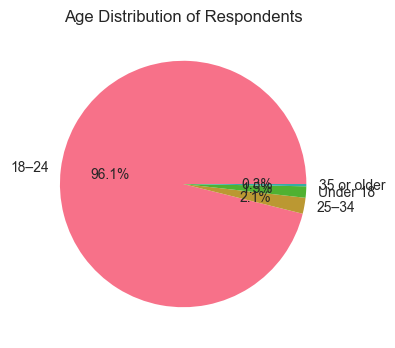

In [3]:
# 1. Age Distribution
plt.figure(figsize=(8, 4))
age_counts = df['How old are you?'].value_counts()
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')
plt.title('Age Distribution of Respondents')
plt.show()

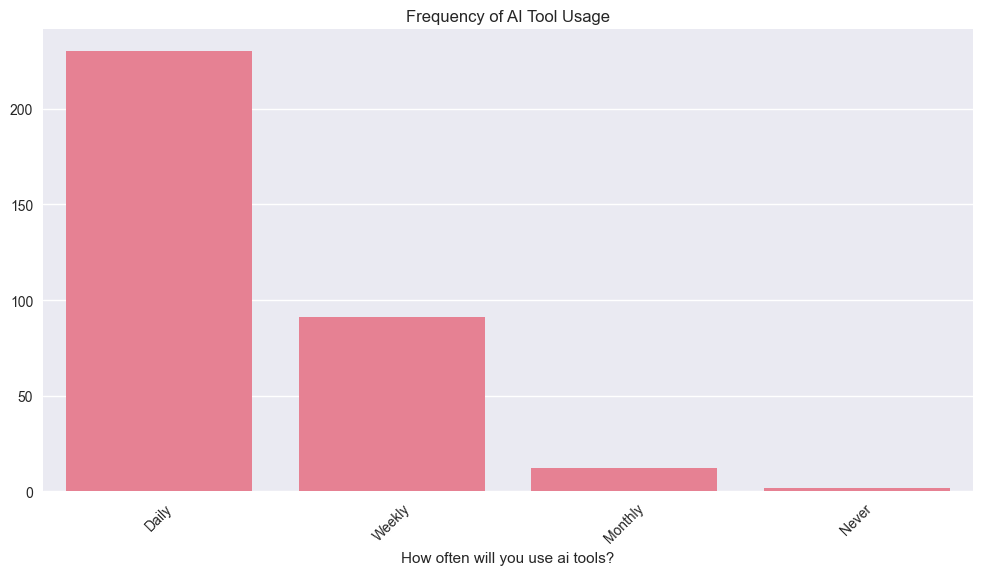

In [4]:
# 2. AI Tool Usage Frequency
plt.figure(figsize=(12, 6))
usage_counts = df['How often will you use ai tools?'].value_counts()
sns.barplot(x=usage_counts.index, y=usage_counts.values)
plt.title('Frequency of AI Tool Usage')
plt.xticks(rotation=45)
plt.show()

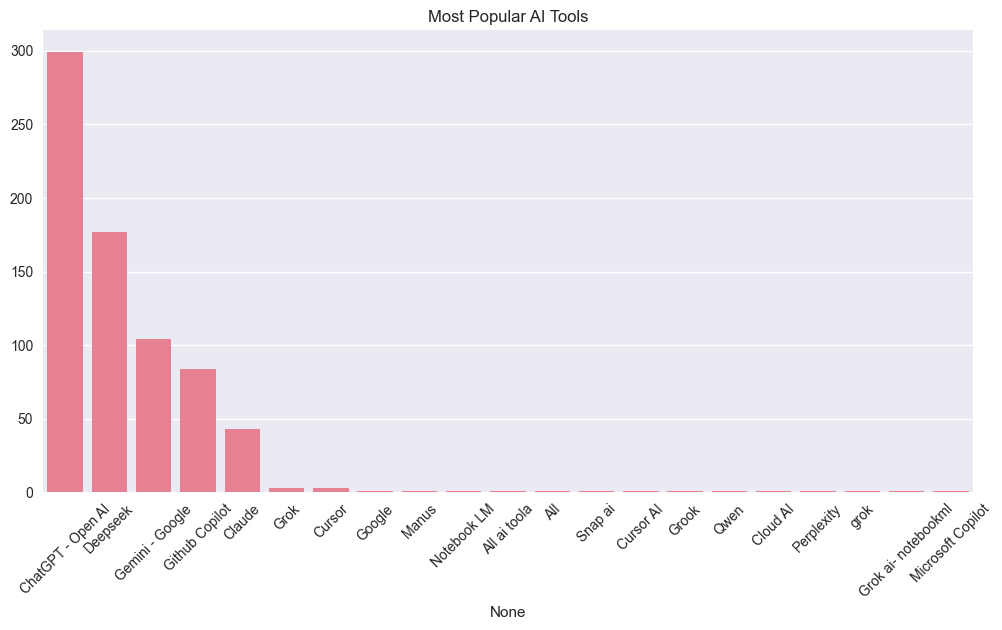

In [5]:
# 3. Most Popular AI Tools
# Split the tools column and count occurrences
all_tools = []
for tools in df['Which tools of AI tools you prefer the most?']:
    if isinstance(tools, str):
        all_tools.extend([tool.strip() for tool in tools.split(';') if tool.strip()])

tool_counts = pd.Series(all_tools).value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=tool_counts.index, y=tool_counts.values)
plt.title('Most Popular AI Tools')
plt.xticks(rotation=45)
plt.show()

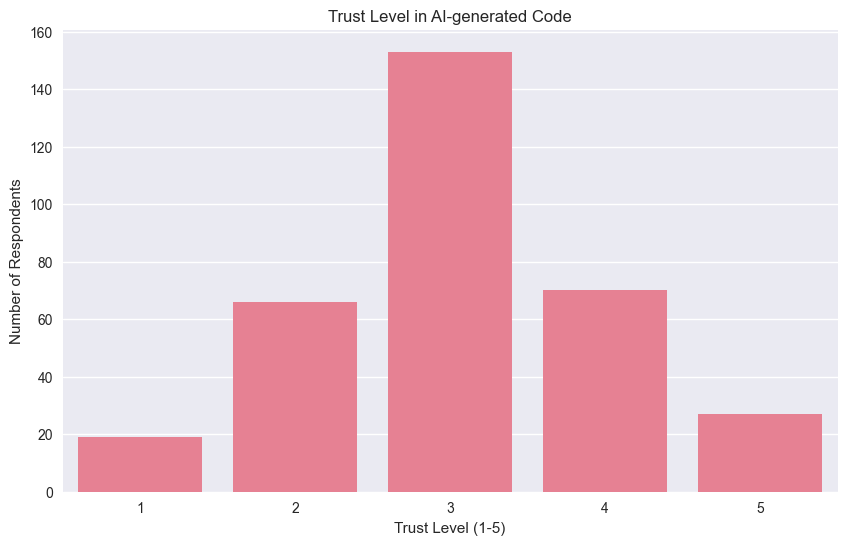

In [6]:
# 4. Trust in AI-generated Code
plt.figure(figsize=(10, 6))
trust_counts = df['On a scale of 1-5, how much do you trust AI-generated code without manual review?'].value_counts().sort_index()
sns.barplot(x=trust_counts.index, y=trust_counts.values)
plt.title('Trust Level in AI-generated Code')
plt.xlabel('Trust Level (1-5)')
plt.ylabel('Number of Respondents')
plt.show()

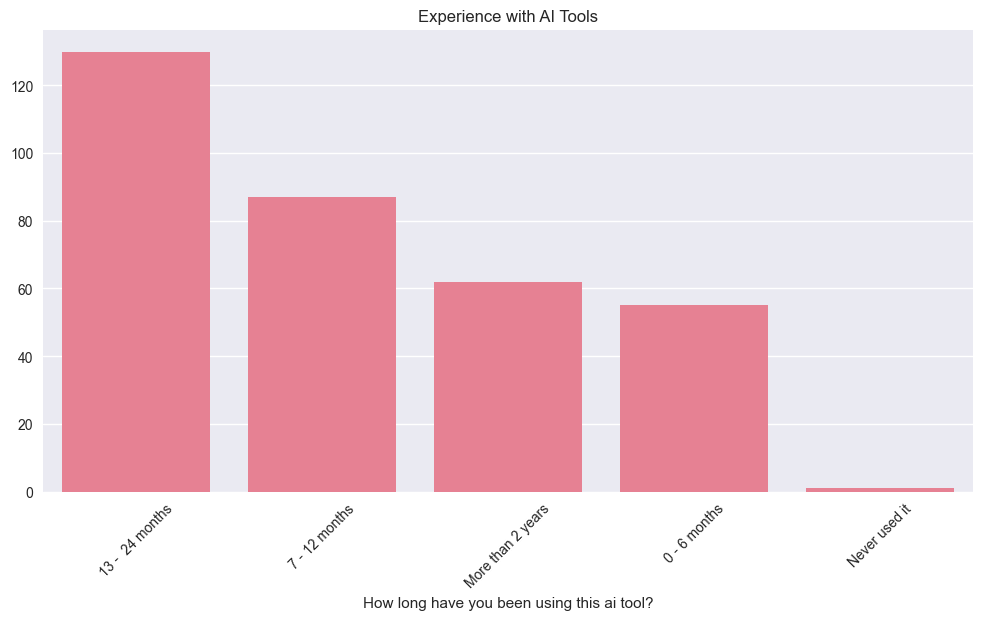

In [7]:
# 5. Experience with AI Tools
plt.figure(figsize=(12, 6))
experience_counts = df['How long have you been using this ai tool?'].value_counts()
sns.barplot(x=experience_counts.index, y=experience_counts.values)
plt.title('Experience with AI Tools')
plt.xticks(rotation=45)
plt.show()

In [9]:
# 6. Impact on Productivity
# First, let's see what columns are available
print("Available columns:")
print(df.columns.tolist())
print("\n" + "="*50 + "\n")

# Let's search for productivity-related columns
productivity_related = [col for col in df.columns if any(keyword in col.lower() for keyword in ['efficiency', 'repetitive', 'debugging', 'productivity'])]
print("Productivity-related columns found:")
for col in productivity_related:
    print(f"- {col}")
print("\n" + "="*50 + "\n")

# Let's also check columns that contain "AI" and might be Likert scale questions
ai_related = [col for col in df.columns if 'AI' in col and any(word in col.lower() for word in ['improved', 'reduced', 'help', 'tools'])]
print("AI-related columns found:")
for col in ai_related:
    print(f"- {col}")

Available columns:
['ID', 'Start time', 'Completion time', 'Email', 'Name', 'Last modified time', 'How old are you?', 'What best describes your current role or background?', 'Have you used AI-powered tools for software development?', 'Which tools of AI tools you prefer the most?', 'Rate your AI tool', 'AI-powered tools have improved my efficiency as a developer', 'I frequently use AI-assisted coding tools in my workflow', 'AI tools have reduced the time I spend on repetitive coding tasks', 'I trust AI-generated code without extensive manual review', 'AI-powered debugging tools help me identify and fix errors faster', 'I rely on AI tools for learning and improving my coding skills', 'AI-generated code suggestions align well with best practices in software development', 'The AI tools I use provide relevant and accurate code recommendations', 'How often will you use ai tools?', 'On a scale of 1-5, how much do you trust AI-generated code without manual review?', 'AI-assisted coding speeds 

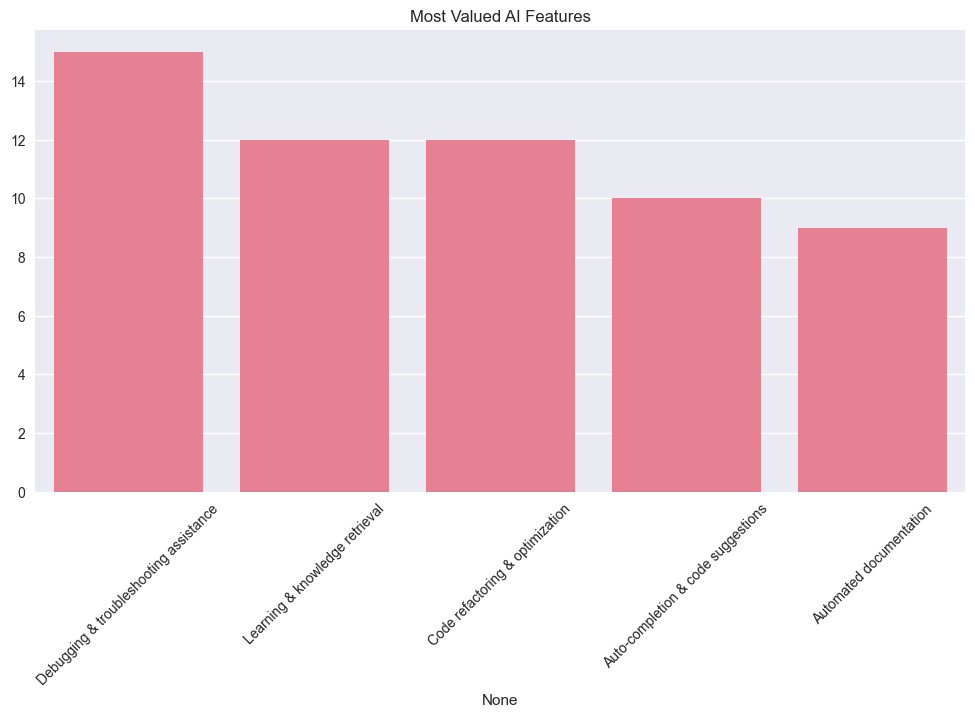

In [15]:
# 7. Most Valued AI Features
# Split the features column and count occurrences
all_features = []
for features in df['Which AI features have contributed the most to your productivity?']:
    if isinstance(features, str):
        all_features.extend([feature.strip() for feature in features.split(';') if feature.strip()])

feature_counts = pd.Series(all_features).value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_counts.index, y=feature_counts.values)
plt.title('Most Valued AI Features')
plt.xticks(rotation=45)
plt.show()